In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [2]:
df=pd.read_csv('Medicare_Provider_Util_Payment_PUF_CY2016.txt', sep='\t')
df = df.iloc[1:] # remove licencse line

/Users/JessZhai/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# dataframe after process v2
df_v2 = df.iloc[:,[5,9,11,12,14,17,19,22,23,24]] # only get required columns
df_v2.head()

,NPPES_PROVIDER_GENDER,NPPES_PROVIDER_CITY,NPPES_PROVIDER_STATE,NPPES_PROVIDER_COUNTRY,MEDICARE_PARTICIPATION_INDICATOR,HCPCS_DESCRIPTION,LINE_SRVC_CNT,AVERAGE_MEDICARE_ALLOWED_AMT,AVERAGE_SUBMITTED_CHRG_AMT,AVERAGE_MEDICARE_PAYMENT_AMT
1,M,CUMBERLAND,MD,US,Y,Hospital observation care discharge,57.0,72.743158,325.157895,54.474386
2,M,CUMBERLAND,MD,US,Y,Hospital observation care typically 50 minutes,38.0,135.010000,614.000000,105.850000
3,M,CUMBERLAND,MD,US,Y,Hospital observation care typically 70 minutes...,23.0,189.239565,769.347826,146.116522
4,M,CUMBERLAND,MD,US,Y,"Initial hospital inpatient care, typically 30 ...",20.0,100.750000,460.000000,78.990000
5,M,CUMBERLAND,MD,US,Y,"Initial hospital inpatient care, typically 50 ...",96.0,136.250000,625.000000,105.477604


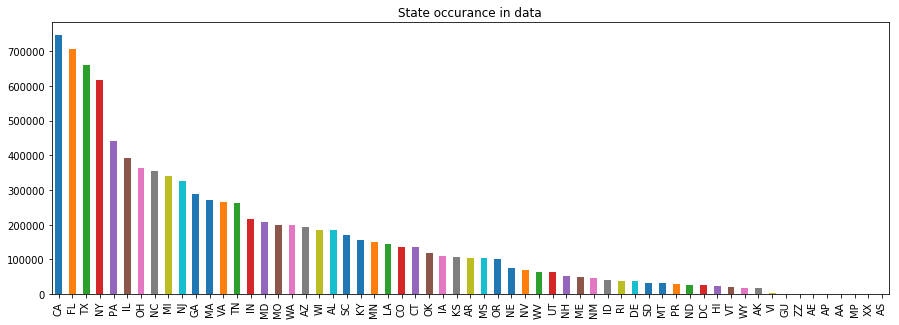

In [4]:
# create hist by state
df_v2.loc[:,'NPPES_PROVIDER_STATE'].value_counts().plot(kind='bar',figsize=(15,5),title="State occurance in data")

In [5]:
df_v2=df_v2.iloc[:,[1,6,7,8,9]] # we will only do analysis on cities and medicare numbers
df_v2["TOTAL_MEDICARE_PAY"] = df_v2["AVERAGE_MEDICARE_ALLOWED_AMT"] * df_v2["LINE_SRVC_CNT"]
df_v2["TOTAL_SUBMITTED_CHARGE"] = df_v2["AVERAGE_SUBMITTED_CHRG_AMT"] * df_v2["LINE_SRVC_CNT"]

In [6]:
# Group by Cities, do SUM(),get total value for each city 
df_v2=df_v2.groupby(['NPPES_PROVIDER_CITY']).sum()

In [7]:
# average submitted charge amount for each city
df_v2['AVERAGE_SUBMITTED'] = df_v2['TOTAL_SUBMITTED_CHARGE'] / df_v2['LINE_SRVC_CNT']

In [8]:
df_v2["AVERAGE_SUBMITTED"].describe()

count    12867.000000
mean       140.908393
std        289.737090
min          1.012140
25%         63.053184
50%         99.627230
75%        149.828140
max      25322.528872
Name: AVERAGE_SUBMITTED, dtype: float64

(array([2071., 4392., 4763.,  581.,  281.,  153.]),
 array([  0,  50, 100, 200, 250, 300, 350]),
 <a list of 6 Patch objects>)

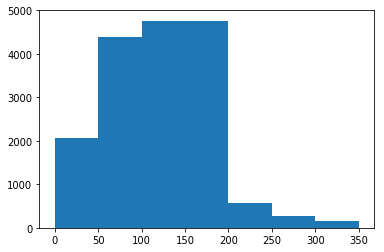

In [9]:
# get the histogram for average submitted. 
plt.hist(df_v2["AVERAGE_SUBMITTED"], bins=[0,50,100,200,250,300,350])

In [10]:
# average medicare allowed by cities
df_v2['AVERAGE_MEDICARE_ALLOWED'] = df_v2['TOTAL_MEDICARE_PAY'] / df_v2['LINE_SRVC_CNT']

In [11]:
# describe the data, find distribution
df_v2['AVERAGE_MEDICARE_ALLOWED'].describe()

count    12867.000000
mean        54.237545
std         51.077371
min          0.999663
25%         34.077879
50%         48.212574
75%         65.223226
max       3248.504513
Name: AVERAGE_MEDICARE_ALLOWED, dtype: float64

(array([ 669., 3954., 4193., 2362.,  943.,  584.,  105.]),
 array([  0,  20,  40,  60,  80, 100, 150, 200]),
 <a list of 7 Patch objects>)

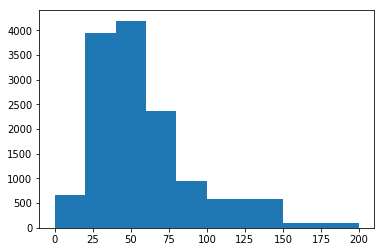

In [12]:
# plot histogram, check the result
plt.hist(df_v2["AVERAGE_MEDICARE_ALLOWED"], bins=[0,20,40,60,80,100,150,200])

Since the data is left-skewed, we can do some cleaning on those data based on removing outliers in the dataframe.

In [13]:
# did some cleaning
df_v3 = df_v2.loc[(df_v2['AVERAGE_SUBMITTED'] <= 350) & (df_v2['AVERAGE_MEDICARE_ALLOWED'] <= 200)]

In [14]:
df_v3['LINE_SRVC_CNT'].describe()

count    1.223700e+04
mean     1.936218e+05
std      8.778424e+05
min      1.100000e+01
25%      1.398000e+03
50%      7.918800e+03
75%      5.428400e+04
max      2.126502e+07
Name: LINE_SRVC_CNT, dtype: float64

(array([2552., 1085.,  666.,  521.,  400.,  352.,  281.,  279.,  201.,
         167.,  185.,  154.,  135.,  109.,  109.,  108.,  100.,   92.,
          87.]),
 array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
         9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000,
        18000, 19000]),
 <a list of 19 Patch objects>)

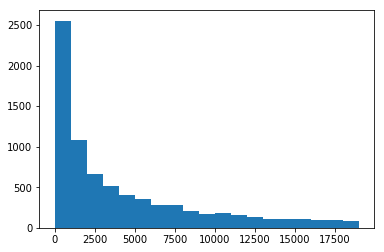

In [15]:
# line service count by cities
plt.hist(df_v3["LINE_SRVC_CNT"], bins=range(0,20000,1000))

In [16]:
df_v3["MEDICARE_COVERAGE"] = df_v3["AVERAGE_MEDICARE_ALLOWED"]/df_v3["AVERAGE_SUBMITTED"]

/Users/JessZhai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
df_v3["MEDICARE_COVERAGE"].describe()

count    12237.000000
mean         0.521436
std          0.182479
min          0.064809
25%          0.388575
50%          0.490595
75%          0.625027
max          1.000000
Name: MEDICARE_COVERAGE, dtype: float64

(array([  48.,  351., 1440., 2801., 2562., 2005., 1285.,  691.,  452.,
         602.]),
 array([0.06480881, 0.15832793, 0.25184705, 0.34536617, 0.43888529,
        0.53240441, 0.62592353, 0.71944264, 0.81296176, 0.90648088,
        1.        ]),
 <a list of 10 Patch objects>)

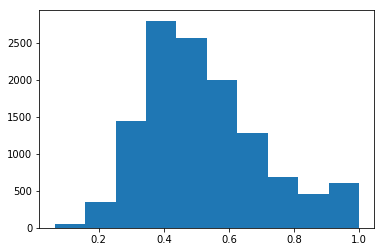

In [18]:
# mediare coverage histogram
plt.hist(df_v3["MEDICARE_COVERAGE"], bins=10)

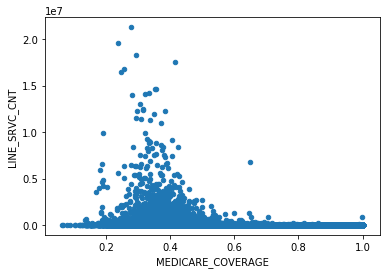

In [19]:
df_v3.plot.scatter(x='MEDICARE_COVERAGE',y='LINE_SRVC_CNT')

In [22]:
# calculate wss values by selecting several possible cluster counts. 
X=df_v3[['MEDICARE_COVERAGE','LINE_SRVC_CNT']].values
data = []
for i in range(2,20):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    data.append(kmeans.inertia_)

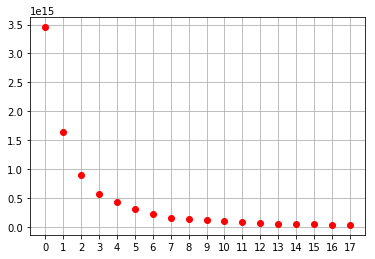

In [23]:
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0,20,1))
plt.plot(data,'ro')
plt.grid()
plt.show()

So we can tell that 3 is the optimum cluster number to choose.

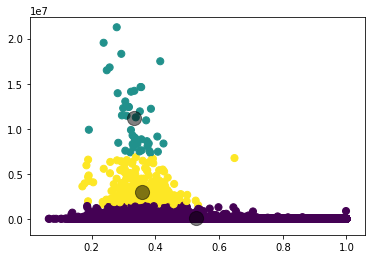

In [24]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5); # K-Cluster